In [5]:
import pandas as pd
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("h2opes.txt", sep='\s+')
len(data)

739

max energy: -75.82541836, min energy: -76.19814929


/var/folders/hf/60jhbx_s40b92cvfxl5gbbb80000gn/T/ipykernel_2555/153744967.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


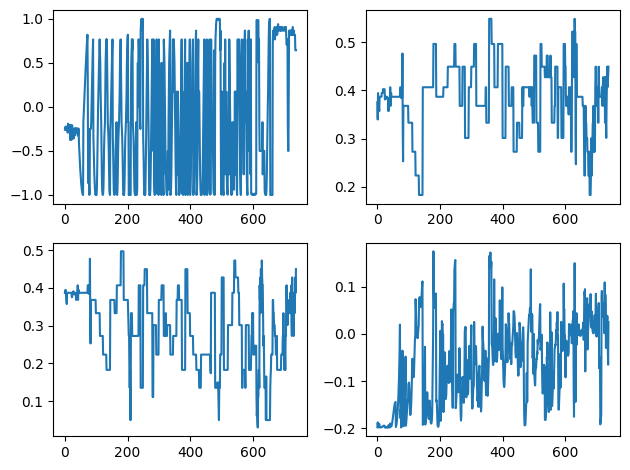

In [8]:
fig, ax = plt.subplots(2, 2)
ax[0, 0].plot(range(len(data)), jnp.cos(jnp.array(data["theta"]) * jnp.pi / 180))
ax[0, 1].plot(range(len(data)), jnp.exp(-jnp.array(data["r1"])))
ax[1, 0].plot(range(len(data)), jnp.exp(-jnp.array(data["r2"])))
ax[1, 1].plot(range(len(data)), data["energy"] + 76)
# ax[1, 1].set_yticks([])
fig.tight_layout()
fig.show()
max_e = max(data["energy"])
min_e = min(data["energy"])
print(f"max energy: {max_e}, min energy: {min_e}")

In [7]:
from random import random
nitems = len(data)
train_idx = []
valid_idx = []
test_idx = []
for idx in range(nitems):
    u = random()
    if u < 0.7:
        train_idx.append(idx)
    elif u < 0.9:
        valid_idx.append(idx)
    else:
        test_idx.append(idx)

train_data = {'theta': [data['theta'][idx] for idx in train_idx], 'r1': [data['r1'][idx] for idx in train_idx], 'r2': [data['r2'][idx] for idx in train_idx], 'energy': [data['energy'][idx] for idx in train_idx]}
train_df = pd.DataFrame(train_data)
train_df.to_csv("h2opes_train.txt")

valid_data = {'theta': [data['theta'][idx] for idx in valid_idx], 'r1': [data['r1'][idx] for idx in valid_idx], 'r2': [data['r2'][idx] for idx in valid_idx], 'energy': [data['energy'][idx] for idx in valid_idx]}
valid_df = pd.DataFrame(valid_data)
valid_df.to_csv("h2opes_valid.txt")

test_data = {'theta': [data['theta'][idx] for idx in test_idx], 'r1': [data['r1'][idx] for idx in test_idx], 'r2': [data['r2'][idx] for idx in test_idx], 'energy': [data['energy'][idx] for idx in test_idx]}
test_df = pd.DataFrame(test_data)
test_df.to_csv("h2opes_test.txt")

